In [1]:
# load packages
library(purrr)          |> suppressPackageStartupMessages()
library(Rgraphviz)      |> suppressPackageStartupMessages()
library(bnlearn)        |> suppressPackageStartupMessages()
library(bnstruct)       |> suppressPackageStartupMessages()
source('K2methods.r')   |> suppressPackageStartupMessages()
child <- read.csv('https://www.ccd.pitt.edu/wiki/images/CHILD10k.csv')

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"


In [2]:
# Map the string values to integers values
column.mapping = function(column) {
  unique.values <- unique(column)
  mapped.table <- tibble(
      string.value = unique.values, 
      numeric.value = seq_along(unique.values)
  )
  mapped.column <- mapped.table$numeric.value[match(column, mapped.table$string.value)]
  return(mapped.column)
}

In [6]:
# convert the dataset into a series of intengers
child.modified = child
child.modified <- child.modified %>% mutate(across(
    everything(), ~ column.mapping(.)))

# convert the dataset into a series of factors
for (i in 1:length(names(child.modified))) {
    name = names(child.modified)[i]
    child.modified[, name] = as.factor(as.character(child.modified[, name]))
}

DF = data.frame(child.modified, stringsAsFactors = TRUE)

colnames(DF) <- names(child)
head(DF)

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,2,1,2,2,1,2,2,2,2,2,1,1,1,2,2,2,1,1
3,1,1,2,1,3,1,2,2,1,2,3,2,1,1,2,2,2,1,2,1
4,1,1,1,1,2,2,1,1,1,1,2,3,2,1,1,2,3,2,3,1
5,1,1,1,1,3,1,1,1,1,2,3,4,1,2,1,1,1,1,1,2
6,1,1,1,1,1,1,1,1,2,2,4,4,2,2,1,1,3,1,1,2


In [7]:
today = 03072023 # default seed = 12345

In [16]:
struct = K2(n = ncol(DF), u = 2, D = DF, seed = today, num.iterations = 2)

order = BirthAsphyxia HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHreport LowerBodyO2 RUQO2 CO2Report XrayReport Disease GruntingReport Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick 
Running iteration # 1 u = 1 
The Network score is -134478.2 
  Running iteration # 1 u = 2 
The Network score is -127588.5 
  order = LungFlow XrayReport LowerBodyO2 DuctFlow Sick Grunting LVH Age BirthAsphyxia HypDistrib LVHreport CO2Report GruntingReport CardiacMixing RUQO2 ChestXray CO2 Disease HypoxiaInO2 LungParench 
Running iteration # 2 u = 1 
The Network score is -138605.2 
  Running iteration # 2 u = 2 
The Network score is -132229.6 
   DONE 

Total execution time: 0.8856304 mins


| $num.iteration$ |                                                                                                         order                                                                                                        |    $best-u$   | $best-score_{K2}$ |
|:---------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------------:|:-----------------:|
|        1        | BirthAsphyxia Disease Age <br>LVH DuctFlow CardiacMixing <br>LungParench LungFlow Sick <br>HypDistrib HypoxiaInO2 CO2 <br>ChestXray Grunting LVHReport <br>LowerBodyO2 RUQO2 CO2Report <br>XrayReport GruntingReport | 2,3,4,5,6,7,8 |     -59945.13     |
|        2        |   XrayReport HypoxiaInO2 LungFlow <br>LowerBodyO2 GruntingReport CardiacMixing <br>LVHReport Grunting BirthAsphyxia <br>Disease LungParench HypDistrib <br>ChestXray RUQO2 Sick <br>DuctFlow LVH CO2 Age CO2Report   |  3,4,5,6,7,8  |     -62150.59     |
|        2        | Sick LVH Disease <br>ChestXray RUQO2 HypoxiaInO2 <br>GruntingReport CO2 XrayReport <br>CardiacMixing CO2Report DuctFlow <br>LungFlow LowerBodyO2 LungParench <br>Grunting Age LVHReport <br>HypDistrib BirthAsphyxia |       2       |     -61125.26     |
|        3        | XrayReport Sick Age <br>HypoxiaInO2 LungFlow LVH <br>ChestXray Grunting LVHReport <br>CardiacMixing DuctFlow LungParench <br>HypDistrib GruntingReport CO2Report <br>CO2 LowerBodyO2 Disease <br>RUQO2 BirthAsphyxia |       3       |     -62622.48     |
|        4        | LungParench CardiacMixing RUQO2 <br>ChestXray LungFlow CO2Report <br>LowerBodyO2 CO2 DuctFlow <br>LVH LVHReport Disease <br>GruntingReport BirthAsphyxia XrayReport <br>HypDistrib Age HypoxiaInO2 <br>Grunting Sick |       3       |     -62237.56     |
|        5        | XrayReport Grunting LungParench <br>LVH DuctFlow CardiacMixing <br>Age ChestXray Disease <br>CO2Report Sick RUQO2 <br>LungFlow LVHReport LowerBodyO2 <br>HypDistrib BirthAsphyxia HypoxiaInO2 <br>GruntingReport CO2 |       3       |     -63300.66     |
|     $\vdots$    |                                                                                                       $\vdots$                                                                                                       |    $\vdots$   |      $\vdots$     |
|        15       | HypDistrib CO2Report LVH <br>CO2 LowerBodyO2 LungParench <br>CardiacMixing XrayReport DuctFlow <br>LungFlow RUQO2 LVHReport <br>GruntingReport HypoxiaInO2 Grunting <br>ChestXray BirthAsphyxia Age <br>Disease Sick |       3       |     -63426.72     |

In [17]:
struct

$dag
$dag[[1]]
[1] NA

$dag[[2]]
[1] 1

$dag[[3]]
[1] 2 1

$dag[[4]]
[1] 2

$dag[[5]]
[1] 3 4

$dag[[6]]
[1] 5 4

$dag[[7]]
[1] 5 2

$dag[[8]]
[1] 3 2

$dag[[9]]
[1] 3

$dag[[10]]
[1] 4

$dag[[11]]
[1] 5

$dag[[12]]
[1] 5 7

$dag[[13]]
[1] 6

$dag[[14]]
[1] 12

$dag[[15]]
[1]  7 12

$dag[[16]]
[1] 12  2

$dag[[17]]
[1] 12  3

$dag[[18]]
[1]  5 12

$dag[[19]]
[1]  5 12

$dag[[20]]
[1] 12 14


$score
[1] -127588.5

$order
 [1] "BirthAsphyxia"  "HypDistrib"     "HypoxiaInO2"    "CO2"           
 [5] "ChestXray"      "Grunting"       "LVHreport"      "LowerBodyO2"   
 [9] "RUQO2"          "CO2Report"      "XrayReport"     "Disease"       
[13] "GruntingReport" "Age"            "LVH"            "DuctFlow"      
[17] "CardiacMixing"  "LungParench"    "LungFlow"       "Sick"          

$u
[1] 2

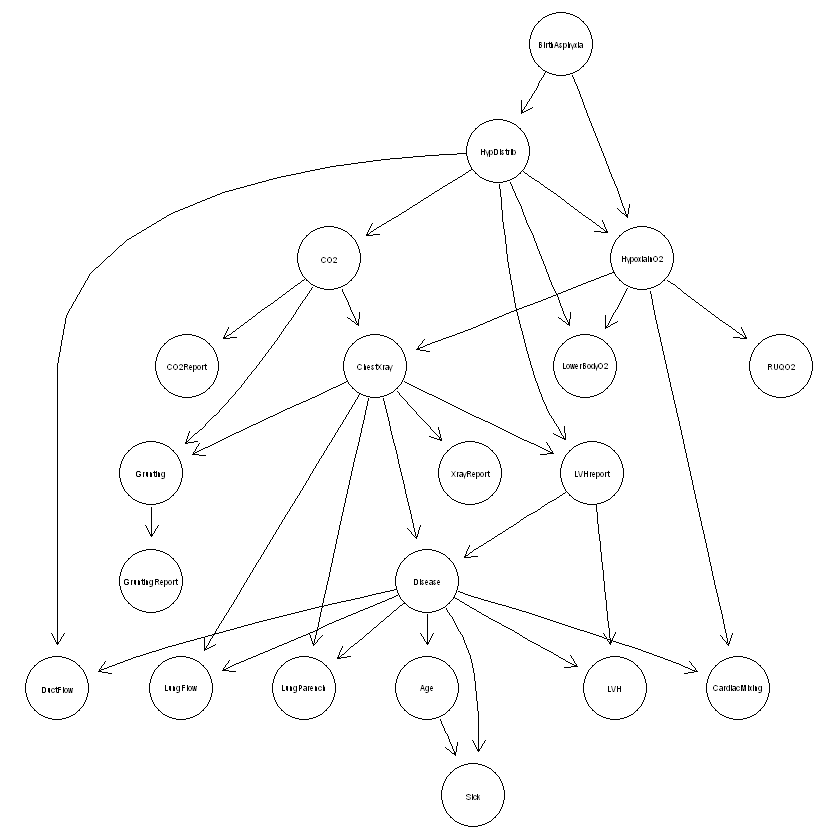

In [18]:
dag = get_dag(names(DF), struct$dag)
graphviz.plot(dag)

In [19]:
arc.strength(dag, data=DF, criterion="x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,BirthAsphyxia,HypDistrib,2.079386e-10
2,HypDistrib,HypoxiaInO2,2.274156e-48
3,BirthAsphyxia,HypoxiaInO2,5.475563e-06
4,HypDistrib,CO2,5.194685e-05
5,HypoxiaInO2,ChestXray,1.361022e-115
6,CO2,ChestXray,2.572174e-129
7,ChestXray,Grunting,3.133414e-242
8,CO2,Grunting,3.832882e-39
9,ChestXray,LVHreport,3.491379e-56


## `bnlearn` comparison

In [9]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node Age (multinomial distribution)

Conditional probability table:
 
   Disease
Age          1          2          3          4          5          6
  1 0.90256410 0.75529286 0.35092673 0.80362145 0.83265491 0.87802607
  2 0.07641026 0.16142390 0.20561830 0.13915566 0.11216644 0.09450652
  3 0.02102564 0.08328324 0.44345497 0.05722289 0.05517865 0.02746741

  Parameters of node BirthAsphyxia (multinomial distribution)

Conditional probability table:
          1          2 
0.08622754 0.91377246 

  Parameters of node CardiacMixing (multinomial distribution)

Conditional probability table:
 
             Disease
CardiacMixing           1           2           3           4           5
            1 0.394230769 0.023091565 0.013955256 0.007578031 0.013907734
            2 0.408076923 0.074183530 0.132547785 0.017481993 0.026119403
            3 0.172692308 0.092215989 0.825857950 0.953856543 0.941994573
            4 0.025000000 0.8105089